In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

from AtlasCommonUtils import SetAtlasStyle
from ROOT import TLatex



rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)




#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

Welcome to JupyROOT 6.22/02


In [2]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [4]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []

    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('tau1b')

    if(isMC):
        scalar.append('gen_x')
        scalar.append('gen_y')
        scalar.append('gen_tau1b')
        scalar.append('gen_Q2')


    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print ('\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds')
    return pd.concat([x for x in dataframes])

In [27]:
def applyCutsJets(df,isMC=False):
    temp = df
    #temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'tau1b>0 and tau1b<1', '0<tau1b<1')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)

    #temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    #temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
   # temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    #temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    #temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('gen_logQ2= log(gen_Q2)/2.3025850', inplace=True)

    #    temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
    #    temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## Get dataframes, apply selection

In [6]:
path = '/home/miguel/HERA/20-12-18-19-14-testalldata/out_em0405/'
dataname = path+'data.root'
mcname = path+'Rapgap_Eminus0405.root'
altmcname = path+'Django_Eminus0405.root'

In [41]:
data_cut     = applyCutsJets(getJetData([dataname]))
mc_cut = applyCutsJets(getJetData([mcname],isMC=True),isMC=True)
altmc_cut= applyCutsJets(getJetData([altmcname],isMC=True),isMC=True)


 Processed /home/miguel/HERA/20-12-18-19-14-testalldata/out_em0405/data.root in 0.4 seconds
0.2 < y < 0.7 130421  fraction kept: 10.8
Q2>150 99404  fraction kept: 76.2
0<tau1b<1 86374  fraction kept: 86.9

 Processed /home/miguel/HERA/20-12-18-19-14-testalldata/out_em0405/Rapgap_Eminus0405.root in 18.0 seconds
0.2 < y < 0.7 7253036  fraction kept: 18.5
Q2>150 5959686  fraction kept: 82.2
0<tau1b<1 5243547  fraction kept: 88.0

 Processed /home/miguel/HERA/20-12-18-19-14-testalldata/out_em0405/Django_Eminus0405.root in 21.7 seconds
0.2 < y < 0.7 7896354  fraction kept: 17.0
Q2>150 6378363  fraction kept: 80.8
0<tau1b<1 5555405  fraction kept: 87.1


In [42]:
mc_cut = mc_cut[:1000000]
altmc_cut = altmc_cut[:1000000]

### Define UniFold Algorithm


In [43]:
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import keras.backend as K
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

## Define features (input for the unfolding)

In [44]:
Q2_0_G = mc_cut['gen_logQ2']
Q2_0_S =mc_cut['logQ2']
Q2_unknown_G = altmc_cut['gen_logQ2']
Q2_unknown_S = altmc_cut['logQ2']

y_0_G = mc_cut['gen_y']
y_0_S =mc_cut['y']
y_unknown_G = altmc_cut['gen_y']
y_unknown_S = altmc_cut['y']

tau1b_0_G = mc_cut['gen_tau1b']
tau1b_0_S =mc_cut['tau1b']
tau1b_unknown_G = altmc_cut['gen_tau1b']
tau1b_unknown_S = altmc_cut['tau1b']

## Show input for closure test (i.e. synthetic and natural datasets using mc and altmc)

/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


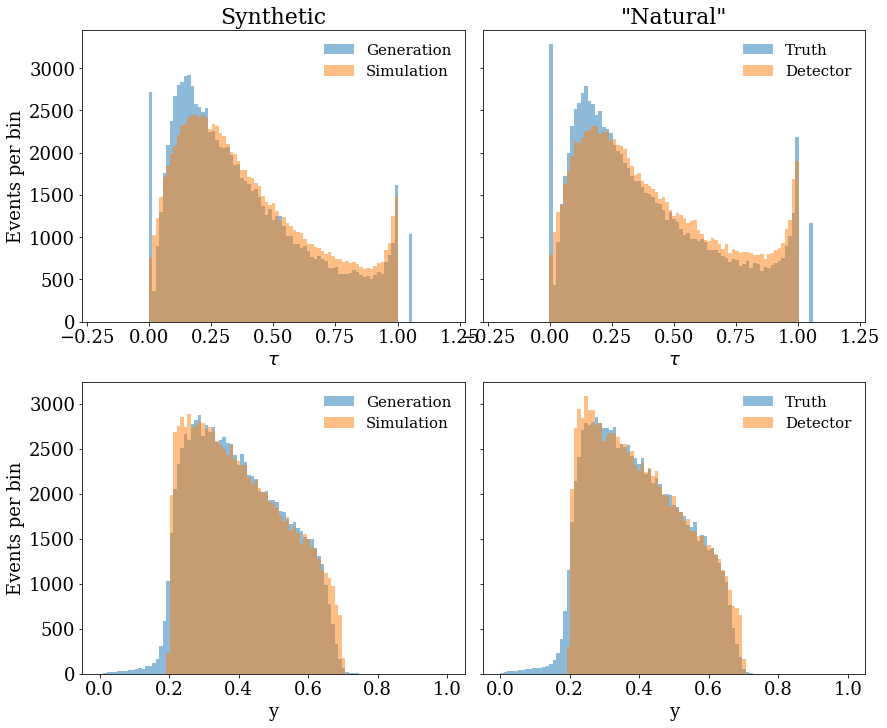

In [32]:
fig, ax = plt.subplots(2,
                       2,
                       figsize=(12, 10),
                       constrained_layout=True,
                       sharey='row')

#bins = np.linspace(2.5, np.pi, 20)
## Define Multifold 
#bins = np.linspace(2, 5,100 )

#ax[0, 0].set_title('Synthetic',fontsize=22)
#ax[0, 0].set_xlabel(r'$\log Q^{2}$')
#ax[0, 0].set_ylabel('Events per bin')
#hG0, _, _ = ax[0, 0].hist(Q2_0_G, bins=bins, alpha=0.5, label='Generation')
#hS0, _, _ = ax[0, 0].hist(Q2_0_S, bins=bins, alpha=0.5, label='Simulation')
#legend = ax[0, 0].legend(loc='best', frameon=False)
#plt.setp(legend.get_title(), multialignment='center')

#ax[0, 1].set_title('"Natural"',fontsize=22)
#ax[0, 1].set_xlabel(r'$\log Q^{2}$')
#hG1, _, _ = ax[0, 1].hist(Q2_unknown_G, bins=bins, alpha=0.5, label='Truth')
#hS1, _, _ = ax[0, 1].hist(Q2_unknown_S,
#                          bins=bins,
#                          alpha=0.5,
#                          label='Detector')
#legend = ax[0, 1].legend(loc='best', frameon=False)
#plt.setp(legend.get_title(), multialignment='center')


bins = np.linspace(-0.2, 1.2,100 )

ax[0, 0].set_title('Synthetic',fontsize=22)
ax[0, 0].set_xlabel(r'$\tau$')
ax[0, 0].set_ylabel('Events per bin')
hG0, _, _ = ax[0, 0].hist(tau1b_0_G, bins=bins, alpha=0.5, label='Generation')
hS0, _, _ = ax[0, 0].hist(tau1b_0_S, bins=bins, alpha=0.5, label='Simulation')
legend = ax[0, 0].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[0, 1].set_title('"Natural"',fontsize=22)
ax[0, 1].set_xlabel(r'$\tau$')
hG1, _, _ = ax[0, 1].hist(tau1b_unknown_G, bins=bins, alpha=0.5, label='Truth')
hS1, _, _ = ax[0, 1].hist(tau1b_unknown_S,
                          bins=bins,
                          alpha=0.5,
                          label='Detector')
legend = ax[0, 1].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')




bins = np.linspace(0, 1, 100)

ax[1, 0].set_xlabel('y')
ax[1, 0].set_ylabel('Events per bin')
hG0, _, _ = ax[1, 0].hist(y_0_G,
                          bins=bins,
                          alpha=0.5,
                          label='Generation')
hS0, _, _ = ax[1, 0].hist(y_0_S,
                          bins=bins,
                          alpha=0.5,
                          label='Simulation')
legend = ax[1, 0].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[1, 1].set_xlabel('y')
hG1, _, _ = ax[1, 1].hist(y_unknown_G,
                          bins=bins,
                          alpha=0.5,
                          label='Truth')
hS1, _, _ = ax[1, 1].hist(y_unknown_S,
                          bins=bins,
                          alpha=0.5,
                          label='Detector')
legend = ax[1, 1].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center',fontsize=32)

# plt.ylim([0,1.5*np.max(np.concatenate((hG0, hG1, hS0, hS1)))])

fig.show()

## Define Multifold 

In [59]:
# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))
"""    Arguments:
        num_observables: number of observables to 
                            simultaneously unfold (integer)
                            
        iterations: number of iterations (integer)
        
        theta0_G: tuple or list of nominal 
                    generation-level observables as Numpy arrays
                    
        theta0_S: tuple or list of nominal 
                    simulation-level observables as Numpy arrays
                    
        theta_unknown_S: tuple or list of "natural" 
                            (unknown) simulation-level observables 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""


def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S):

    theta0_G = np.stack(theta0_G, axis=1)
    theta0_S = np.stack(theta0_S, axis=1)
    theta_unknown_S = np.stack(theta_unknown_S, axis=1)

    labels0 = np.zeros(len(theta0_G))
    labels1 = np.ones(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))
    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))
    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels1))
    
    weights = np.empty(shape=(iterations, 2, len(theta0_G)))
    # shape = (iteration, step, event)

    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_G))

    inputs = Input((num_observables, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                                  verbose=1,
                                  restore_best_weights=True)

    # from NN (DCTR)
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(np.nan_to_num(weights)) # np.squeeze(weights)

    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))

        # STEP 1: classify Sim. (which is reweighted by weights_push) to Data
        # weights reweighted Sim. --> Data
        print("STEP 1\n")

        weights_1 = np.concatenate(
            (weights_push, np.ones(len(theta_unknown_S))))
        # actual weights for Sim., ones for Data

        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
            xvals_1, yvals_1, weights_1)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_1,
                  Y_train_1,
                  sample_weight=w_train_1,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_1, Y_test_1, w_test_1),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_pull = weights_push * reweight(theta0_S)
        weights[i, :1, :] = weights_pull
        
        #print('Max and min weight_pull in Step #1')
        #print(max(weights[i, 1, :]))
        #print(min(weights[i, 1, :]))
        

        # STEP 2: classify Gen. to reweighted Gen. (which is reweighted by weights_pull)
        # weights Gen. --> reweighted Gen.
        print("\nSTEP 2\n")

        weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for Gen., actual weights for (reweighted) Gen.

        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_2,
                  Y_train_2,
                  sample_weight=w_train_2,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_2, Y_test_2, w_test_2),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_push = reweight(theta0_G)
        weights[i, 1:2, :] = weights_pull
        
        #print('Max and min weight_pull in Step #2')
        #print(max(weights[i, 1:2, :]))
        #print(min(weights[i, 1:2, :]))

    return weights, model

## Unfold two variables simultaneously

In [46]:
K.clear_session()

In [39]:
num_observables = 3

# simple / 100. standardization s.t. data is of order ~1

weights, _ = multifold(num_observables=num_observables,
                       iterations=4,
                       theta0_G=(Q2_0_G , y_0_G, tau1b_0_G ),
                       theta0_S=(Q2_0_S , y_0_S, tau1b_0_G),
                       theta_unknown_S=(Q2_unknown_S , y_unknown_S , tau1b_unknown_S))

STEP 1

Epoch 1/200
15/15 [==============================] - 4s 294ms/step - loss: 0.6919 - accuracy: 0.5249 - val_loss: 0.6904 - val_accuracy: 0.5386
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5336 - val_loss: 0.6901 - val_accuracy: 0.5342
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6899 - accuracy: 0.5346 - val_loss: 0.6895 - val_accuracy: 0.5379
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.5348 - val_loss: 0.6892 - val_accuracy: 0.5413
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5356 - val_loss: 0.6894 - val_accuracy: 0.5387
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5365 - val_loss: 0.6891 - val_accuracy: 0.5415
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5360 - val_loss: 0.6891 - val_accuracy: 0.5397
Epo

Epoch 59/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5417 - val_loss: 0.6852 - val_accuracy: 0.5429
Epoch 60/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.5425 - val_loss: 0.6848 - val_accuracy: 0.5463
Epoch 61/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.5425 - val_loss: 0.6847 - val_accuracy: 0.5449
Epoch 62/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.5421 - val_loss: 0.6847 - val_accuracy: 0.5476
Epoch 63/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.5433 - val_loss: 0.6846 - val_accuracy: 0.5465
Epoch 64/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.5418 - val_loss: 0.6843 - val_accuracy: 0.5468
Epoch 65/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6842 - accuracy: 0.5412 - val_loss: 0.6842 - val_accuracy: 0.5466
Epoch 

15/15 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.5447 - val_loss: 0.6805 - val_accuracy: 0.5466
Epoch 117/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6801 - accuracy: 0.5445 - val_loss: 0.6807 - val_accuracy: 0.5463
Epoch 118/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6798 - accuracy: 0.5457 - val_loss: 0.6806 - val_accuracy: 0.5468
Epoch 119/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.5447 - val_loss: 0.6805 - val_accuracy: 0.5482
Epoch 120/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6799 - accuracy: 0.5446 - val_loss: 0.6806 - val_accuracy: 0.5450
Epoch 121/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6805 - accuracy: 0.5407 - val_loss: 0.6804 - val_accuracy: 0.5457
Epoch 122/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.5446 - val_loss: 0.6804 - val_accuracy: 0.5481
Epoch 123/200

15/15 [==============================] - 0s 6ms/step - loss: 0.6738 - accuracy: 0.5572 - val_loss: 0.6744 - val_accuracy: 0.5594
Epoch 174/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.5581 - val_loss: 0.6745 - val_accuracy: 0.5606
Epoch 175/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.5581 - val_loss: 0.6751 - val_accuracy: 0.5564
Epoch 176/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6734 - accuracy: 0.5574 - val_loss: 0.6742 - val_accuracy: 0.5590
Epoch 177/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6734 - accuracy: 0.5576 - val_loss: 0.6740 - val_accuracy: 0.5593
Epoch 178/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6731 - accuracy: 0.5580 - val_loss: 0.6743 - val_accuracy: 0.5587
Epoch 179/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.5581 - val_loss: 0.6738 - val_accuracy: 0.5598
Epoch 180/200

15/15 [==============================] - 0s 6ms/step - loss: 0.6801 - accuracy: 0.4998 - val_loss: 0.6808 - val_accuracy: 0.4990
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6801 - accuracy: 0.5007 - val_loss: 0.6811 - val_accuracy: 0.4989
Epoch 32/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6801 - accuracy: 0.5004 - val_loss: 0.6812 - val_accuracy: 0.4987
Epoch 33/200
15/15 [==============================] - 0s 13ms/step - loss: 0.6802 - accuracy: 0.5006 - val_loss: 0.6810 - val_accuracy: 0.4985
Epoch 34/200
15/15 [==============================] - 0s 16ms/step - loss: 0.6801 - accuracy: 0.5006 - val_loss: 0.6809 - val_accuracy: 0.4981
Epoch 35/200
15/15 [==============================] - 0s 17ms/step - loss: 0.6801 - accuracy: 0.5005 - val_loss: 0.6814 - val_accuracy: 0.4990
Epoch 36/200
15/15 [==============================] - 0s 17ms/step - loss: 0.6803 - accuracy: 0.5007 - val_loss: 0.6809 - val_accuracy: 0.4987
Epoch 37/200
15

15/15 [==============================] - 0s 6ms/step - loss: 0.6719 - accuracy: 0.4999 - val_loss: 0.6712 - val_accuracy: 0.4996
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6719 - accuracy: 0.4999 - val_loss: 0.6714 - val_accuracy: 0.4997
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6720 - accuracy: 0.5006 - val_loss: 0.6711 - val_accuracy: 0.4996
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6717 - accuracy: 0.5005 - val_loss: 0.6710 - val_accuracy: 0.5006
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6716 - accuracy: 0.5000 - val_loss: 0.6709 - val_accuracy: 0.5018
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6716 - accuracy: 0.5001 - val_loss: 0.6714 - val_accuracy: 0.4979
Epoch 10/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.4999 - val_loss: 0.6709 - val_accuracy: 0.5013
Epoch 11/200
15/15 [====

15/15 [==============================] - 0s 7ms/step - loss: 0.6872 - accuracy: 0.5096 - val_loss: 0.6873 - val_accuracy: 0.5101
Epoch 11/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5017 - val_loss: 0.6872 - val_accuracy: 0.5082
Epoch 12/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5189 - val_loss: 0.6871 - val_accuracy: 0.5137
Epoch 13/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.4981 - val_loss: 0.6870 - val_accuracy: 0.4994
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5100 - val_loss: 0.6871 - val_accuracy: 0.5061
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5119 - val_loss: 0.6872 - val_accuracy: 0.5175
Epoch 16/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6871 - accuracy: 0.5030 - val_loss: 0.6870 - val_accuracy: 0.5020
Epoch 17/200
15/15 

15/15 [==============================] - 0s 7ms/step - loss: 0.6686 - accuracy: 0.5002 - val_loss: 0.6690 - val_accuracy: 0.4982
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6686 - accuracy: 0.5008 - val_loss: 0.6691 - val_accuracy: 0.4977
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.5006 - val_loss: 0.6691 - val_accuracy: 0.4988
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6685 - accuracy: 0.5010 - val_loss: 0.6688 - val_accuracy: 0.4972
Epoch 9/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6683 - accuracy: 0.5010 - val_loss: 0.6692 - val_accuracy: 0.4978
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6684 - accuracy: 0.5007 - val_loss: 0.6689 - val_accuracy: 0.4974
Epoch 11/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6684 - accuracy: 0.5012 - val_loss: 0.6696 - val_accuracy: 0.4974
Epoch 12/200
15/15 [===

15/15 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.4995 - val_loss: 0.6643 - val_accuracy: 0.5009
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.4994 - val_loss: 0.6646 - val_accuracy: 0.4999
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.4999 - val_loss: 0.6641 - val_accuracy: 0.5007
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.4999 - val_loss: 0.6643 - val_accuracy: 0.5002
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6648 - accuracy: 0.5000 - val_loss: 0.6644 - val_accuracy: 0.5012
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.4997 - val_loss: 0.6648 - val_accuracy: 0.5008
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.4999 - val_loss: 0.6644 - val_accuracy: 0.5000
Epoch 11/200
15/15 [====

ITERATION: 1


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


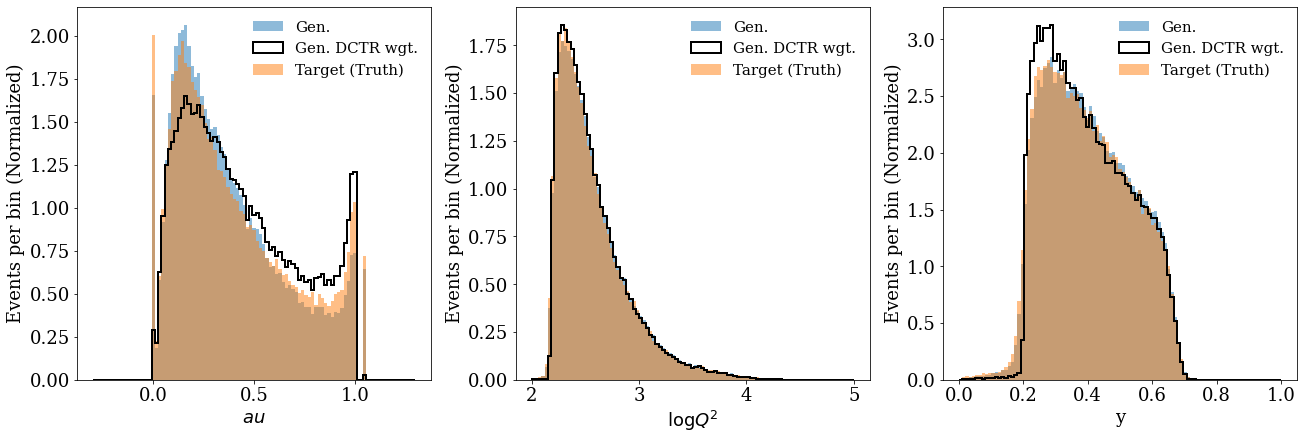

ITERATION: 2


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


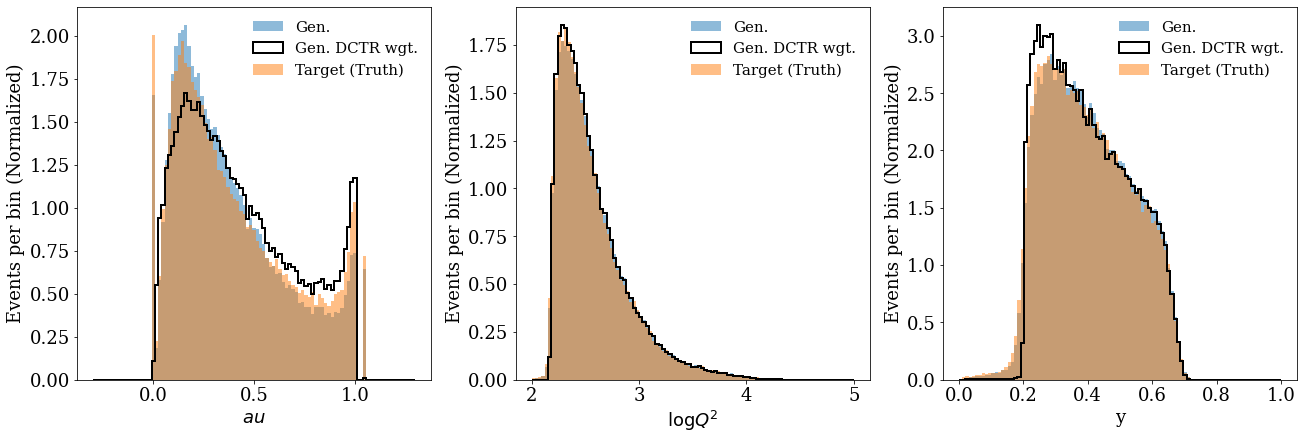

ITERATION: 3


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


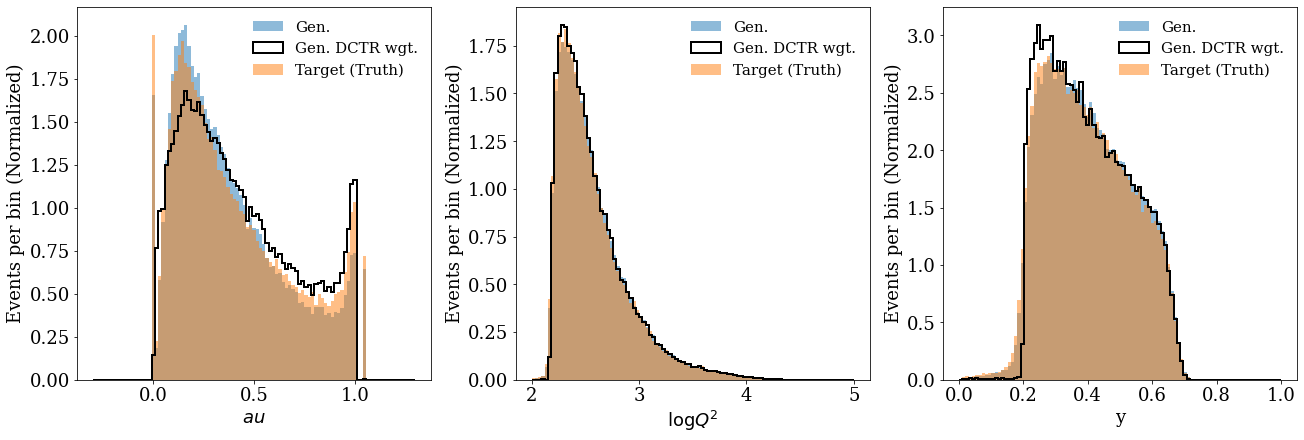

ITERATION: 4


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


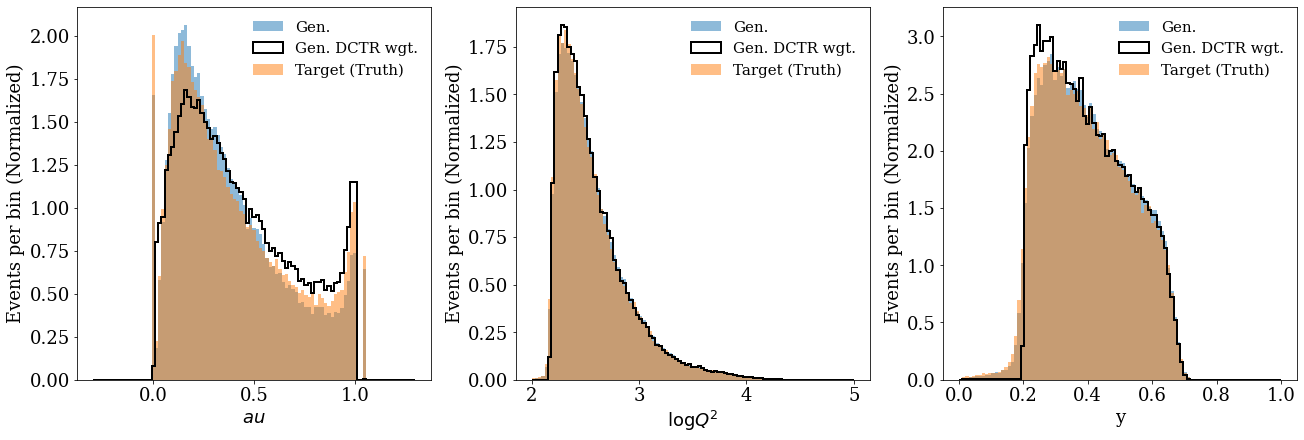

In [40]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           num_observables,
                           figsize=(18, 6),
                           constrained_layout=True)
    bins = np.linspace(-0.3, 1.3,100 )

    ax[0].set_xlabel('$\tau$')
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(tau1b_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[0].hist(tau1b_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)

    ax[0].hist(tau1b_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    ax[0].legend(frameon=False)
    
    
    
    bins = np.linspace(2, 5,100 )

    ax[1].set_xlabel('$\log Q^{2}$')
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(Q2_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[1].hist(Q2_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)

    ax[1].hist(Q2_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    ax[1].legend(frameon=False)

    bins = np.linspace(0, 1,100 )

    ax[2].set_xlabel('y')
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(y_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[2].hist(y_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)
    ax[2].hist(y_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    ax[2].legend(frameon=False)

    fig.show()
    plt.show()

In [ ]:
for i in range(len(weights)):
    print(max(weights[i, 1, :]))
    print(min(weights[i, 1, :]))

In [ ]:
K.clear_session()

## Define features with data

In [71]:
Q2_0_G = mc_cut['gen_logQ2']
Q2_0_S =mc_cut['logQ2']
Q2_unknown_S = data_cut['logQ2']

y_0_G = mc_cut['gen_y']
y_0_S =mc_cut['y']
y_unknown_S = data_cut['y']

tau1b_0_G = mc_cut['gen_tau1b']
tau1b_0_S =mc_cut['tau1b']
tau1b_unknown_S = data_cut['tau1b']

## Run unfolding on data

In [87]:
K.clear_session()

In [88]:
num_observables = 3

# simple / 100. standardization s.t. data is of order ~1

weights, _ = multifold(num_observables=num_observables,
                       iterations=3,
                       theta0_G=(Q2_0_G , y_0_G, tau1b_0_G ),
                       theta0_S=(Q2_0_S , y_0_S, tau1b_0_S),
                       theta_unknown_S=(Q2_unknown_S , y_unknown_S , tau1b_unknown_S))


ITERATION: 1

STEP 1

Epoch 1/200
82/82 [==============================] - 24s 295ms/step - loss: 0.3228 - accuracy: 0.9204 - val_loss: 0.2763 - val_accuracy: 0.9206
Epoch 2/200
82/82 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.9204 - val_loss: 0.2761 - val_accuracy: 0.9206
Epoch 3/200
82/82 [==============================] - 0s 5ms/step - loss: 0.2765 - accuracy: 0.9204 - val_loss: 0.2759 - val_accuracy: 0.9206
Epoch 4/200
82/82 [==============================] - 0s 5ms/step - loss: 0.2762 - accuracy: 0.9204 - val_loss: 0.2757 - val_accuracy: 0.9206
Epoch 5/200
82/82 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.9204 - val_loss: 0.2755 - val_accuracy: 0.9206
Epoch 6/200
82/82 [==============================] - 0s 5ms/step - loss: 0.2758 - accuracy: 0.9204 - val_loss: 0.2753 - val_accuracy: 0.9206
Epoch 7/200
82/82 [==============================] - 0s 5ms/step - loss: 0.2757 - accuracy: 0.9204 - val_loss: 0.2752 - val_accu

82/82 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.9204 - val_loss: 0.2750 - val_accuracy: 0.9206
Epoch 59/200
82/82 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.9204 - val_loss: 0.2751 - val_accuracy: 0.9206
Epoch 60/200
82/82 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.9204 - val_loss: 0.2750 - val_accuracy: 0.9206
Epoch 61/200
82/82 [==============================] - 0s 3ms/step - loss: 0.2754 - accuracy: 0.9204 - val_loss: 0.2751 - val_accuracy: 0.9206
Epoch 62/200
82/82 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9204 - val_loss: 0.2752 - val_accuracy: 0.9206
Epoch 63/200
82/82 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.9204 - val_loss: 0.2750 - val_accuracy: 0.9206
Epoch 64/200
82/82 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.9204 - val_loss: 0.2751 - val_accuracy: 0.9206
Epoch 65/200
82/82 

Epoch 9/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.2971 - val_loss: 0.1091 - val_accuracy: 0.2097
Epoch 10/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.3363 - val_loss: 0.1091 - val_accuracy: 0.3169
Epoch 11/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.3858 - val_loss: 0.1091 - val_accuracy: 0.5097
Epoch 12/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.4389 - val_loss: 0.1091 - val_accuracy: 0.3257
Epoch 13/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.4497 - val_loss: 0.1091 - val_accuracy: 0.6749
Epoch 14/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.5159 - val_loss: 0.1090 - val_accuracy: 0.3839
Epoch 15/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1084 - accuracy: 0.5291 - val_loss: 0.1089 - val_accuracy: 0.3115
Epoch 1

Epoch 67/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.5591 - val_loss: 0.1086 - val_accuracy: 0.5096
Epoch 68/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.5455 - val_loss: 0.1087 - val_accuracy: 0.6145
Epoch 69/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.5600 - val_loss: 0.1086 - val_accuracy: 0.5757
Epoch 70/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.5556 - val_loss: 0.1086 - val_accuracy: 0.5265
Epoch 71/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.5523 - val_loss: 0.1087 - val_accuracy: 0.5806
Epoch 00071: early stopping

STEP 2

Epoch 1/200
150/150 [==============================] - 25s 167ms/step - loss: 0.1739 - accuracy: 0.5008 - val_loss: 0.1508 - val_accuracy: 0.4978
Epoch 2/200
150/150 [==============================] - 0s 3ms/step - loss: 0.1504 - accuracy: 0.5007 - val_

82/82 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.6203 - val_loss: 0.1114 - val_accuracy: 0.8496
Epoch 11/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.6241 - val_loss: 0.1114 - val_accuracy: 0.3600
Epoch 12/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.5972 - val_loss: 0.1114 - val_accuracy: 0.4405
Epoch 13/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.6016 - val_loss: 0.1113 - val_accuracy: 0.4890
Epoch 14/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.6016 - val_loss: 0.1114 - val_accuracy: 0.7982
Epoch 15/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.6138 - val_loss: 0.1113 - val_accuracy: 0.5703
Epoch 16/200
82/82 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.5938 - val_loss: 0.1113 - val_accuracy: 0.5796
Epoch 17/200
82/82 

150/150 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.4998 - val_loss: 0.1484 - val_accuracy: 0.5005
Epoch 28/200
150/150 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.4998 - val_loss: 0.1484 - val_accuracy: 0.5005
Epoch 00028: early stopping


In [63]:
for i in range(len(weights)):
    #print (weights.shape)
    print((weights[i, :1, :]).shape)
    #print((weights[i, :1, :]).shape)
    #print((weights[i, 1:2, :][0]).shape)


print(len(weights[i, :1, :][0]))    
print(len(weights[i, 1:2, :][0]))

(1, 1000000)
(1, 1000000)
(1, 1000000)
(1, 1000000)
1000000
1000000


## MC at reco level reweighted vs data

ITERATION: 1


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


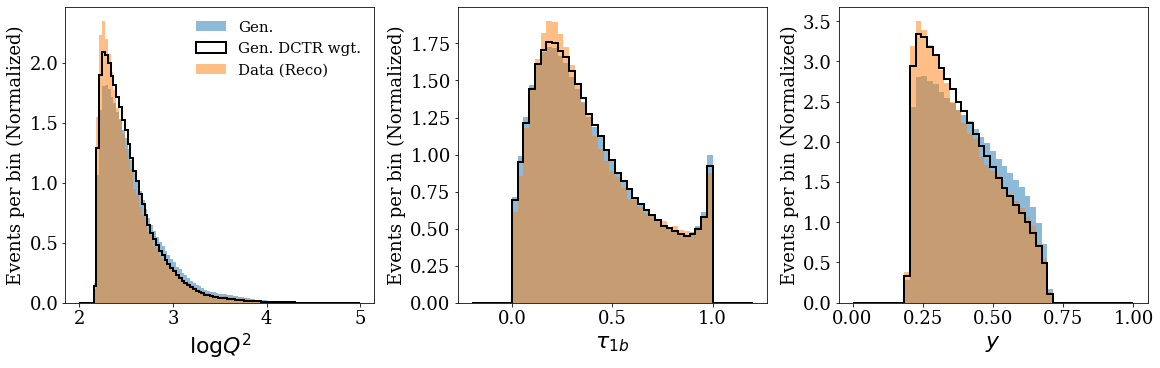

ITERATION: 2


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


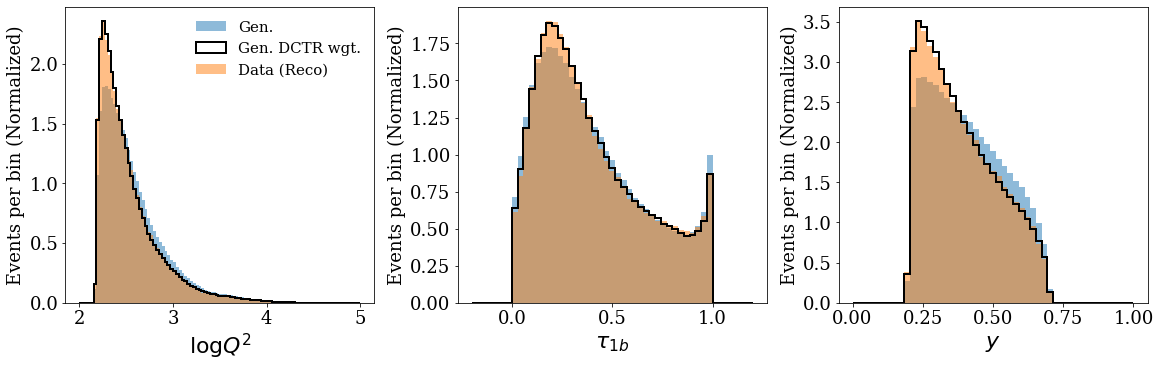

ITERATION: 3


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


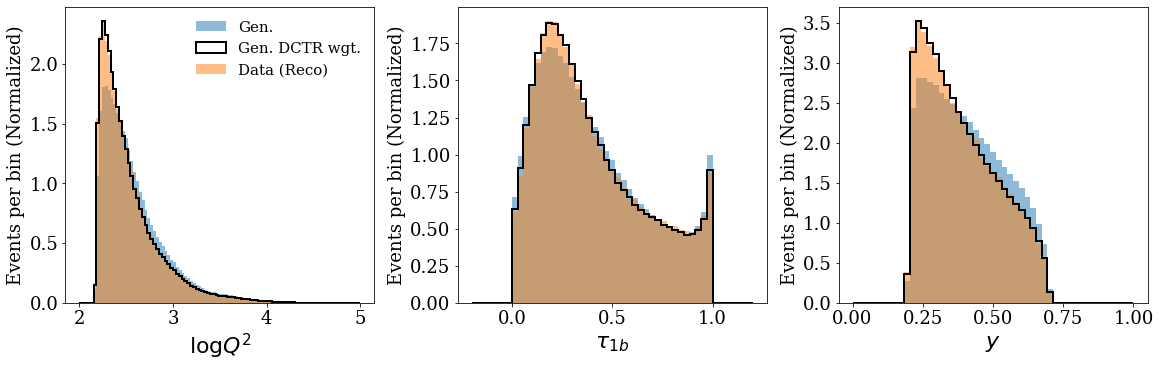

In [91]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2,5, 100)
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           3,
                           figsize=(16, 5),
                           constrained_layout=True)
    ax[0].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(Q2_0_S, bins=bins, label=r'Gen.', **plot_style_2)
    ax[0].hist(Q2_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)

    ax[0].hist(Q2_unknown_S,
               bins=bins,
               label=r'Data (Reco)',
               **plot_style_2)
    ax[0].legend(frameon=False)

    bins = np.linspace(-0.2,1.2, 50)
    #bins = np.linspace(0, 2.0, 40)

    ax[1].set_xlabel(r'$\tau_{1b}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(tau1b_0_S, bins=bins, label=r'Gen.', **plot_style_2)
    ax[1].hist(tau1b_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'Gen. DCTR wgt. = Unfolded',
               **plot_style_1)
    ax[1].hist(tau1b_unknown_S,
               bins=bins,
               **plot_style_2)
    #ax[1].legend(frameon=False)

    
    
    bins = np.linspace(0, 1.0, 50)
   # bins = np.linspace(0, 2.0, 40)

    ax[2].set_xlabel(r'$y$',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(y_0_S, bins=bins, label=r'Gen.', **plot_style_2)
    ax[2].hist(y_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)
    ax[2].hist(y_unknown_S,
               bins=bins,
               **plot_style_2)
    #ax[2].legend(frameon=False)
 
    
    
    
    fig.show()
    plt.show()

## Plot the data at reco level and the gen weighted to match the data at reco level

ITERATION: 1


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


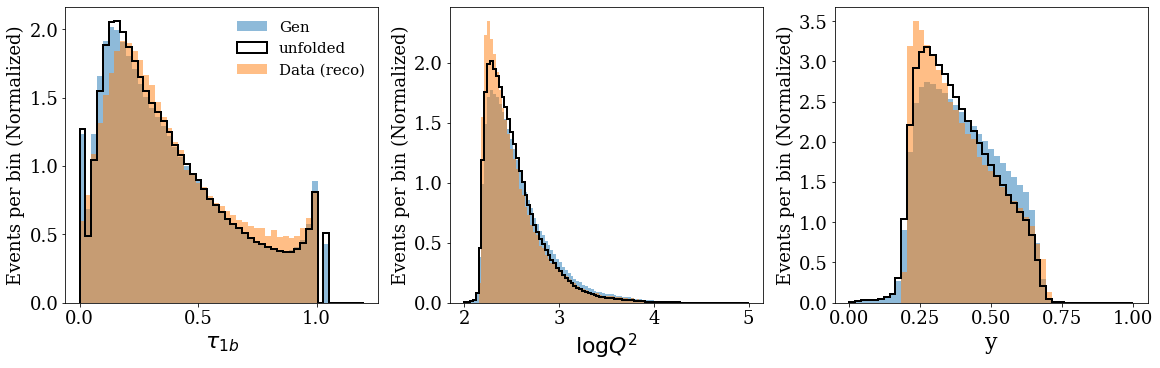

ITERATION: 2


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


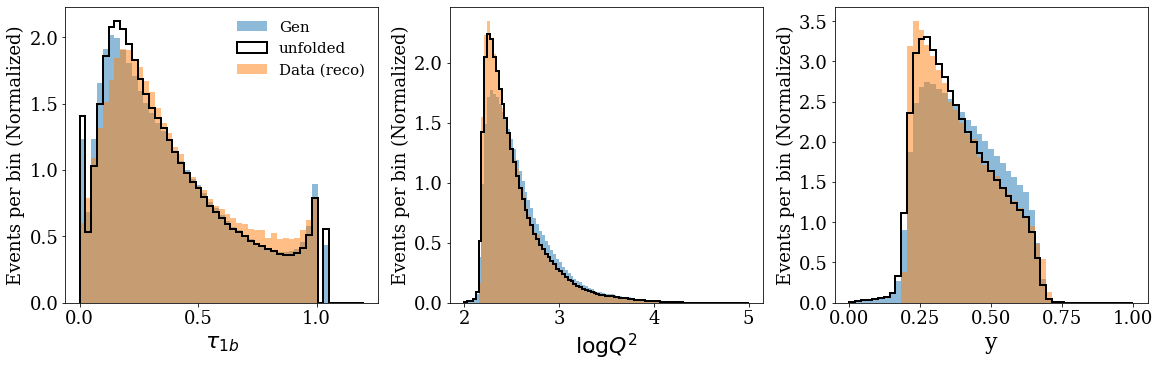

ITERATION: 3


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


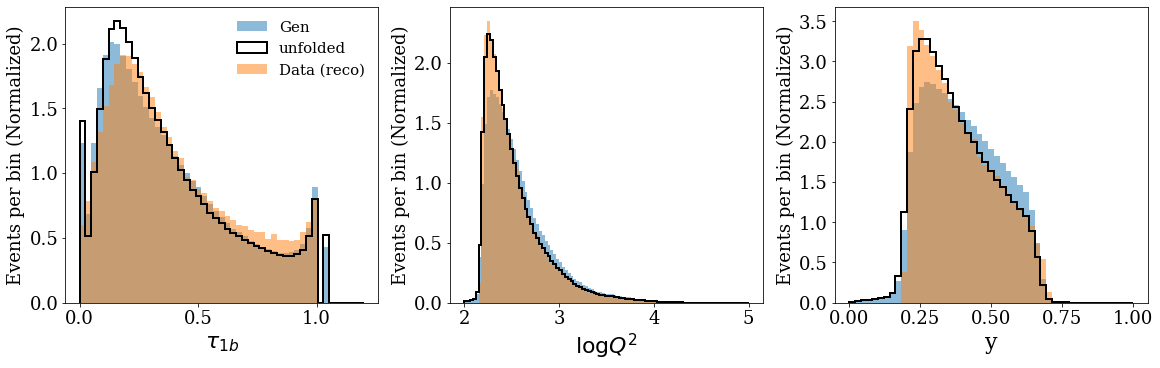

In [93]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(0,1.2, 50)


    fig, ax = plt.subplots(1,
                           3,
                           figsize=(16, 5),
                           constrained_layout=True)
    ax[0].set_xlabel(r'$\tau_{1b}$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(tau1b_0_G, bins=bins, label='Gen', **plot_style_2)
    ax[0].hist(tau1b_0_G,
               bins=bins,
               weights=weights[i, 1:2, :][0],
               label=r'unfolded',
               **plot_style_1)

    ax[0].hist(tau1b_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    ax[0].legend(frameon=False)


    
    bins = np.linspace(2,5, 100)

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(Q2_0_G, bins=bins, label=r'MC (reco)', **plot_style_2)
    ax[1].hist(Q2_0_G,
               bins=bins,
               weights=weights[i, 1:2, :][0],
               label=r'MC DCTR wgt. = Unfolded',
               **plot_style_1)
    ax[1].hist(Q2_unknown_S,
               bins=bins,
               **plot_style_2)

    
    
    bins = np.linspace(0, 1.0, 50)

    ax[2].set_xlabel('y',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(y_0_G, bins=bins, label=r'MC (reco)', **plot_style_2)
    ax[2].hist(y_0_G,
               bins=bins,
               weights=weights[i, 1:2, :][0],
               label=r'MC DCTR wgt.',
               **plot_style_1)
    ax[2].hist(y_unknown_S,
               bins=bins,
               **plot_style_2)

    
    
    
    fig.show()
    plt.show()

## Create dataframe that includes weights

In [54]:
d = {'logQ2': Q2_0_G, 'y': y_0_G, 'tau1b': tau1b_0_G, 'weights': weights[i,1,:]}
df = pd.DataFrame(data=d)



## Plot data, and unfolded results and MC truth

## dphi 

###########
###########
###########


Text(0, 0.5, 'Normalized entries')

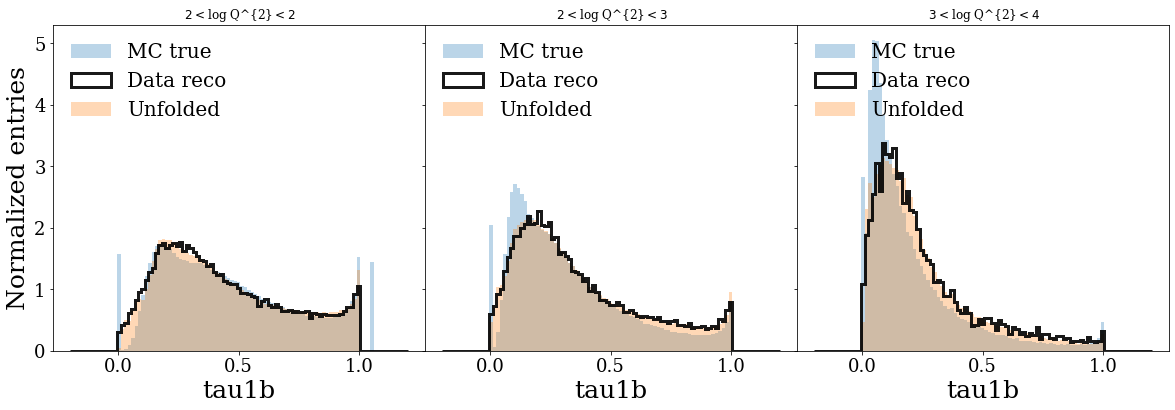

In [56]:
bins = np.linspace(-0.2,1.2 ,100)

#plt.hist(df.query('e_pt>15 and e_pt<20')['dphi'],
#               bins=bins,
#               weights=df.query('e_pt>15 and e_pt<20')['weights'],
#               label=r'Gen. DCTR wgt.',
#               **plot_style_1)



fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

nbins = 36#36
minimo = 2.8
for counter,edges in enumerate([(2,2.5), (2.5,3.0),(3.0,4.0)]):
    cut = ' logQ2 > %2.2f and logQ2 <%2.2f'%(edges[0],edges[1])
    df_cut = df.query(cut)
    #printSummary(df_cut)
    print ('###########')
    axs[counter].xaxis.set_label_text('tau1b', fontsize=25)
    axs[counter].xaxis.set_label_text('tau1b', fontsize=25)

    ##Plot data
    #Nelectrons = df.query(cut).shape[0]
    axs[counter].hist(df_cut['tau1b'],bins=bins,density=True,label='MC true',alpha=0.3)
    axs[counter].hist(data_cut.query(cut)['tau1b'],bins=bins,alpha=0.9,density=True, label='Data reco',color='black',lw=3,histtype='step')

    axs[counter].hist(df_cut['tau1b'],bins=bins,weights=df_cut['weights'],density=True,label = 'Unfolded',alpha=0.3)

    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    axs[counter].set_title(r' $ %2.0f< $log Q^{2}$ < %2.0f$'%(edges[0],edges[1]))

    #axs[counter].text(1.5,2.9,  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(data_cut.query(cut)['x'].mean(), data_cut.query(cut)['Q2'].mean()), fontsize=18)
    #plt.yscale('log')
    
axs[0].yaxis.set_label_text('Normalized entries', fontsize=25)


## Bootstrapping, use MC first

In [ ]:
## define MC first, these will be the same always

In [ ]:
dphi_0_G = mc_cut['genjet_dphi']
dphi_0_S =mc_cut['jet_dphi']
ept_0_G = mc_cut['gene_pt']
ept_0_S =mc_cut['e_pt']
jetpt_0_G = mc_cut['genjet_pt']
jetpt_0_S =mc_cut['jet_pt']

jetz_0_G = mc_cut['genjet_z']
jetz_0_S =mc_cut['jet_z']

qt_0_G = mc_cut['genjet_qtnormjetpt']
qt_0_S = mc_cut['jet_qtnormjetpt']

In [ ]:
bootstrap_data = data_cut.sample(data_cut.shape[0], replace=True)
print(bootstrap_data.shape[0])
bootstrap_data.head()


In [ ]:
data_cut.head()

In [ ]:
K.clear_session()

In [ ]:
bootstraps = 20
iterations = 6 
nvariables = 3
weights = [] 

import timeit


for i in range(bootstraps):
    start = timeit.timeit()

    print ('%i th jackknifedata'%i)
    
    ## define the data input for the unfolding
    #bootstrap_data = data_cut.sample(data_cut.shape[0], replace=True)
    #add Poisson variation of total number of data events used:
    bootstrap_data = data_cut.sample(np.random.poisson(data_cut.shape[0],1)[0], replace=True)
    
    dphi_unknown_S = bootstrap_data['jet_dphi']
    ept_unknown_S = bootstrap_data['e_pt']
    jetpt_unknown_S = bootstrap_data['jet_pt']
    
    num_observables = 3
    i_weight, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=(dphi_0_G, ept_0_G/10.0, jetpt_0_G/10.0),
                       theta0_S=(dphi_0_S, ept_0_S/10.0, jetpt_0_S/10.0),
                       theta_unknown_S=(dphi_unknown_S,
                                        ept_unknown_S/10.0,
                                        jetpt_unknown_S/10.0
                                        )
                      )
    
    weights.append(i_weight)
    end = timeit.timeit()
    print(end - start)


In [ ]:
for i in range(30):
    start = timeit.timeit()

    print ('%i th jackknifedata'%i)

    bootstrap_data = data_cut.sample(np.random.poisson(data_cut.shape[0],1)[0], replace=True)
    
    dphi_unknown_S = bootstrap_data['jet_dphi']
    ept_unknown_S = bootstrap_data['e_pt']
    jetpt_unknown_S = bootstrap_data['jet_pt']
    
    num_observables = 3
    i_weight, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=(dphi_0_G, ept_0_G/10.0, jetpt_0_G/10.0),
                       theta0_S=(dphi_0_S, ept_0_S/10.0, jetpt_0_S/10.0),
                       theta_unknown_S=(dphi_unknown_S,
                                        ept_unknown_S/10.0,
                                        jetpt_unknown_S/10.0
                                        )
                      )
    
    weights.append(i_weight)
    end = timeit.timeit()
    print(end - start)

In [ ]:
for i in range(50):
    start = timeit.timeit()

    print ('%i th jackknifedata'%i)

    bootstrap_data = data_cut.sample(np.random.poisson(data_cut.shape[0],1)[0], replace=True)
    
    dphi_unknown_S = bootstrap_data['jet_dphi']
    ept_unknown_S = bootstrap_data['e_pt']
    jetpt_unknown_S = bootstrap_data['jet_pt']
    
    num_observables = 3
    i_weight, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=(dphi_0_G, ept_0_G/10.0, jetpt_0_G/10.0),
                       theta0_S=(dphi_0_S, ept_0_S/10.0, jetpt_0_S/10.0),
                       theta_unknown_S=(dphi_unknown_S,
                                        ept_unknown_S/10.0,
                                        jetpt_unknown_S/10.0
                                        )
                      )
    
    weights.append(i_weight)
    end = timeit.timeit()
    print(end - start)

In [ ]:
print(len(weights))

# for k in range(bootstraps):
#    for i in range(len(weights[k])):
        #print (weights[k].shape)
        #print((weights[k][i, 1, :]).shape)
        #print((weights[k][i, 1, :]).shape)
        #print((weights[k][i, 1:2, :][0]).shape)
print(myns[:,1])

In [ ]:
bins = np.flip(2*np.pi - np.logspace(np.log10(np.pi),np.log10(2*np.pi),15)) 
print (bins)


In [ ]:
bins = np.flip( 2- np.logspace(np.log10(1),np.log10(2.0),6)) 
print(bins)

In [ ]:
bins = np.linspace(0.0,2.0,10) 
bins = np.append(bins,inf)
print(bins)

In [ ]:
bins = np.logspace(np.log(1.0),np.log10(5.0),12) -1
print(bins)

In [ ]:
bins = np.logspace(np.log(1.0),np.log10(2.0),6) -1
print(bins)

In [ ]:
covariance_matrices = []
for it in range(6):
    myns = []
    #bins = np.logspace(np.log10(0.1),np.log10(1.0),8)
    #bins = np.logspace(np.log10(0.1),np.log10(np.pi),20)
    #bins = np.array([0.0, 2.05491515, 2.45354097, 2.63853135,
    #                 2.8145858,  2.98213597, 3.14159265])

    bins = np.logspace(np.log10(7),np.log10(50),6)
    #bins = np.flip(2*np.pi - np.logspace(np.log10(np.pi),np.log10(2*np.pi),15)) 

    #bins = np.logspace(np.log(1.0),np.log10(5.0),12) -1
    #bins = np.array([0., 0.1,0.2, 0.33994032, 0.55105852  ,1.07832585,2.0])
    #bins = np.flip( 2- np.logspace(np.log10(1),np.log10(2.0),5)) 

    #bins = np.append(bins,inf)

    for k in range(len(weights)):
        n,b,_ = plt.hist(jetpt_0_S,bins=bins,weights=weights[k][it, 1, :],alpha=0.3)
        myns+=[n]
        pass
    myns = np.array(myns)
    #print(myns)
    plt.xlabel('jet pT [GeV]')

    cov = np.array([[np.mean((myns[:,j] - np.mean(myns[:,j]))*(myns[:,i] - np.mean(myns[:,i]))) for i in range(len(myns[0]))] for j in range(len(myns[0]))])
    corr = np.array([[cov[i,j]/(np.sqrt(cov[i,i])*np.sqrt(cov[j,j])) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

    covariance_matrices.append(corr)
    #fig, ax = plt.subplots() 
    #im = ax.imshow(corr,cmap='RdBu', vmin=0.0, vmax=1.0,
    #                         interpolation='none')
    #fig.colorbar(im,ax=ax)

print(covariance_matrices[0])
plt.show()

#print (len(myns))
#print (len(myns[0]))

In [ ]:
#bins = np.flip(2*np.pi - np.logspace(np.log10(np.pi),np.log10(2*np.pi),15)) 
#
#bins = np.array([0.0,1.37784484, 1.84030237, 2.05491515, 2.25916109, 2.45354097, 2.63853135,
# 2.8145858,  2.98213597, 3.14159265])
bins = np.array([0., 0.1,0.2, 0.33994032, 0.55105852 ,1.07832585,2.0])
print(bins)
n,b,_ = plt.hist(qt_0_G,bins=bins,weights=weights[0][-1, 1, :],alpha=0.3)
#plt.yscale('log')
#plt.xscale('log')

In [ ]:
bins = np.logspace(np.log(1.0),np.log10(2.0),9) -1
print(bins)
n,b,_ = plt.hist(z_0_G,bins=bins,weights=weights[0][-1, 1, :],alpha=0.3)

In [ ]:
weights[75][it, 1, :] = 0

In [ ]:
for k in range(80):
    n,b,_ = plt.hist(qt_0_S,bins=bins,weights=weights[k][-1, 1, :],alpha=0.3)

In [ ]:
print(covariance_matrices[0])
print(covariance_matrices[1])
print(covariance_matrices[2])


In [ ]:
fig, ax = plt.subplots(2,3,figsize=(12,12)) 
minimo =-.40
maximo = 1.0
im = ax[0,0].imshow(covariance_matrices[0],cmap='RdBu', vmin=minimo, vmax=1.0,
                             interpolation='none')
im = ax[0,1].imshow(covariance_matrices[1],cmap='RdBu', vmin=minimo, vmax=1.0,
                             interpolation='none')
im = ax[0,2].imshow(covariance_matrices[2],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')
im = ax[1,0].imshow(covariance_matrices[3],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')
im = ax[1,1].imshow(covariance_matrices[4],cmap='RdBu', vmin=minimo, vmax =1.0,
                  interpolation='none')
im = ax[1,2].imshow(covariance_matrices[5],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')


ax[0,0].set_title('iteration #0')
ax[0,1].set_title('iteration #1')
ax[0,2].set_title('iteration #2')
ax[1,0].set_title('iteration #3')
ax[1,1].set_title('iteration #4')
ax[1,2].set_title('iteration #5')


plt.colorbar(im,ax=ax)
plt.show()

In [ ]:
covariance_matrices[4]

In [ ]:
from numpy.linalg import inv
x = [] 
rhos= []
for it in range(6): #iterations
    temp = []
    cov = np.matrix(covariance_matrices[it])
    inversecov = inv(cov)
    for i in range(cov.shape[0]):
         if(cov[i,i]*inversecov[i,i]!=0):
            temp.append( np.sqrt(1- 1.0/(cov[i,i]*inversecov[i,i])))
    rho_it = np.average(temp)
    rhos.append(rho_it)
    x.append(it)
    print (rho_it)
print (x)
print (rhos)

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(x,rhos,'-o')
plt.xlabel('Number of Multifold iterations',fontsize=20)
plt.ylabel('Mean global-correlation coefficient',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [ ]:
cov = np.array([[np.mean((myns[:,j] - np.mean(myns[:,j]))*(myns[:,i] - np.mean(myns[:,i]))) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

In [ ]:
corr = np.array([[cov[i,j]/(np.sqrt(cov[i,i])*np.sqrt(cov[j,j])) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

In [ ]:
fig, ax = plt.subplots() 
im = ax.imshow(corr,cmap='RdBu', vmin=0.0, vmax=1.0,
                             interpolation='none')
fig.colorbar(im,ax=ax)
plt.show()

In [ ]:
print(corr)

In [ ]:

l = dphi_unknown_S
for i in range(10):
    ll = np.random.choice(l, size=l.shape, replace=False) 
    print(ll)
    print(len(ll))

In [ ]:
np.mean(ll)